# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [42]:
# Dependencies and Setup
import hvplot.pandas as hv 
import pandas as pd
import geopy as gpy
import matplotlib as plt
import requests
import holoviews as hv
import numpy as np





# Import API key
from api_keys import geoapify_key

In [43]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,jianshui,23.6363,102.8264,283.85,87,19,1.63,CN,1707667786
1,1,sisimiut,66.9395,-53.6735,254.89,89,100,1.20,GL,1707667786
2,2,vilhena,-12.7406,-60.1458,295.26,98,100,1.76,BR,1707667786
3,3,puerto ayora,-0.7393,-90.3518,303.13,92,49,4.02,EC,1707667786
4,4,dudinka,69.4058,86.1778,239.08,97,53,0.89,RU,1707667786


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
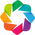

In [44]:
%%capture --no-display
import hvplot.pandas
import holoviews as hv
hv.extension('bokeh')
from bokeh.plotting import show

# Define a custom function to assign colors based on 'Humidity' levels
def assign_color(humidity):
    if humidity < 15:
        return 'blue'
    elif humidity < 30:
        return 'green'
    elif humidity < 45:
        return 'orange'
    elif humidity < 60:
        return 'purple'
    elif humidity < 75:
        return 'magenta'
    elif humidity < 90:
        return 'aqua'
    elif humidity < 95:
        return 'pink'
    elif humidity < 97:
        return 'black'
    else:
        return 'red'

city_data_df['Color'] = city_data_df['Humidity'].apply(assign_color)

map_plot = city_data_df.hvplot.points(
    x='Lng', y='Lat', size='Humidity', color='Color',
    hover_cols=['City'], alpha=0.5,
    tiles='OSM',  # Specify the background map tile source
    geo=True,  # Add the geo parameter
    scale=1,  # Set the scale parameter to control the size of the points
    width=800, height=500
)

map_plot = map_plot.opts(bgcolor='skyblue', show_legend=True, legend_position='right')

show(hv.render(map_plot))

In [11]:
# Create a leaflet map 

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [45]:
# Narrow down cities that fit criteria and drop any results with null values
# Filter the data based on 'Max Temp' range and drop null values
# Filter the DataFrame for cities with temperature between 20 and 30 degrees Celsius
ideal_weather_df = city_data_df[(city_data_df['Max Temp'] > 20) & (city_data_df['Max Temp'] < 30)]

# Drop any null values in the temperature column
ideal_weather_df = ideal_weather_df.dropna(subset=['Max Temp'])

# Create the scatter plot with the filtered DataFrame
map_plot = ideal_weather_df.hvplot.points(
    x='Lng', y='Lat', size='Humidity', color='Humidity',
    cmap='viridis', hover_cols=['City'], alpha=0.5,
    tiles='OSM', geo=True, scale=1,
    width=800, height=500
)

map_plot.opts(bgcolor='skyblue')
map_plot

# Drop any rows with null values
# YOUR CODE HERE

# Display sample data
# YOUR CODE HERE

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (Humidity,City)

### Step 3: Create a new DataFrame called `hotel_df`.

In [13]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
# Create a new DataFrame 'hotel_df' with selected columns from 'city_data_df'
hotel_df = city_data_df[['City', 'Country', 'Lat', 'Lng', 'Humidity']].copy()

# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
hotel_df['Hotel Name'] = ""

# Display sample data
hotel_df.head()

,City,Country,Lat,Lng,Humidity,Hotel Name
0,jianshui,CN,23.6363,102.8264,87,
1,sisimiut,GL,66.9395,-53.6735,89,
2,vilhena,BR,-12.7406,-60.1458,98,
3,puerto ayora,EC,-0.7393,-90.3518,92,
4,dudinka,RU,69.4058,86.1778,97,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [14]:
# Set parameters to search for a hotel
radius = 50000
params = {
    'radius': radius
}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # Get latitude and longitude from the DataFrame
    lat_value = row['Lat']
    long_value = row['Lng']

    # Add filter and bias parameters with the current city's latitude and longitude to the params dictionary
    params['filter'] = f"distance(lat,lng,{long_value},{lat_value})<5000"
    params['bias'] = f"distance(lat,lng,{lat_value},{long_value})"

    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"

    # Make an API request using the params dictionary
    response = requests.get(base_url, params=params)

    # Convert the API response to JSON format
    api_data = response.json()

    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_name = api_data["features"][0]["properties"]["name"]
        hotel_df.loc[index, "Hotel Name"] = hotel_name
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"

    # Log the search results
    print(f"{row['City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data from hotel_df
print(hotel_df)

Starting hotel search
jianshui - nearest hotel: No hotel found
sisimiut - nearest hotel: No hotel found
vilhena - nearest hotel: No hotel found
puerto ayora - nearest hotel: No hotel found
dudinka - nearest hotel: No hotel found
mitsamiouli - nearest hotel: No hotel found
adamstown - nearest hotel: No hotel found
iqaluit - nearest hotel: No hotel found
luganville - nearest hotel: No hotel found
stanley - nearest hotel: No hotel found
vangaindrano - nearest hotel: No hotel found
port-aux-francais - nearest hotel: No hotel found
grytviken - nearest hotel: No hotel found
hawaiian paradise park - nearest hotel: No hotel found
saint-pierre - nearest hotel: No hotel found
kristiansund - nearest hotel: No hotel found
pesaro - nearest hotel: No hotel found
margaret river - nearest hotel: No hotel found
waitangi - nearest hotel: No hotel found
ilulissat - nearest hotel: No hotel found
anadyr - nearest hotel: No hotel found
encheng - nearest hotel: No hotel found
callao - nearest hotel: No hotel

KeyboardInterrupt: 

### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [ ]:
%%capture --no-display

# Update the hover_cols parameter to include 'City', 'Hotel Name', and 'Country'
map_plot = city_data_df.hvplot.points(
    x='Lng', y='Lat', size='Humidity', color='Humidity',
    cmap='viridis', hover_cols=['City', 'Hotel Name', 'Country'], alpha=0.5,
    tiles='OSM', geo=True, scale=1,
    width=800, height=500
)

map_plot.opts(bgcolor='skyblue')
map_plot

# Display the map
# YOUR CODE HERE

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (Humidity,City,Country)